In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import datasets

### step 1 normalize the data


In [5]:
iris =datasets.load_iris()
X=iris.data

X_std=StandardScaler().fit_transform(X)

### step 2 :calculate covariance matrix

In [9]:
cov_matrix=np.cov(X_std.T)

print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### step 3 calculate eigen values and eigen vectors

In [11]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [15]:
print('eigen vectors\n',eig_vecs,'\neigen values\n',eig_vals)

eigen vectors
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]] 
eigen values
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [19]:
eigen_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

In [21]:
eigen_pairs

[(2.938085050199996,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624884,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449481,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462304,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [20]:
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]

cum_var_exp=np.cumsum(var_exp)
print('cumulative variance explained',cum_var_exp)

cumulative variance explained [ 72.96244541  95.8132072   99.48212909 100.        ]


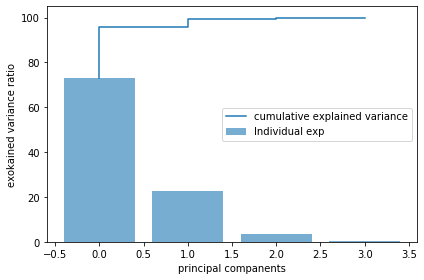

In [29]:
plt.figure(figsize=(6,4))
plt.bar(range(4), var_exp,alpha=0.6,align='center',label='Individual exp')
plt.step(range(4),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('exokained variance ratio')
plt.xlabel('principal companents')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

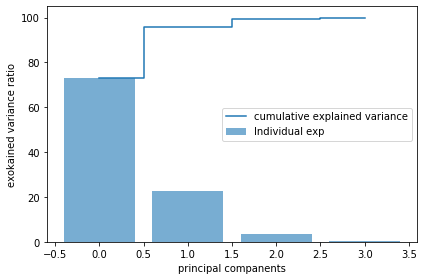

In [30]:
plt.figure(figsize=(6,4))
plt.bar(range(4), var_exp,alpha=0.6,align='center',label='Individual exp')
plt.step(range(4),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('exokained variance ratio')
plt.xlabel('principal companents')
plt.legend(loc='best')
plt.tight_layout()
plt.show()